# Import the necessary libraries

In [1]:
import librosa
import numpy as np
import matplotlib.pyplot as plt
import librosa.display

# Load the build in Datasets

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Audio : [-3.1496835e-05  4.5770039e-06  6.3310695e-06 ... -1.1488050e-05
 -7.4060167e-06 -8.0729505e-06]
Sampling Rate : 22050


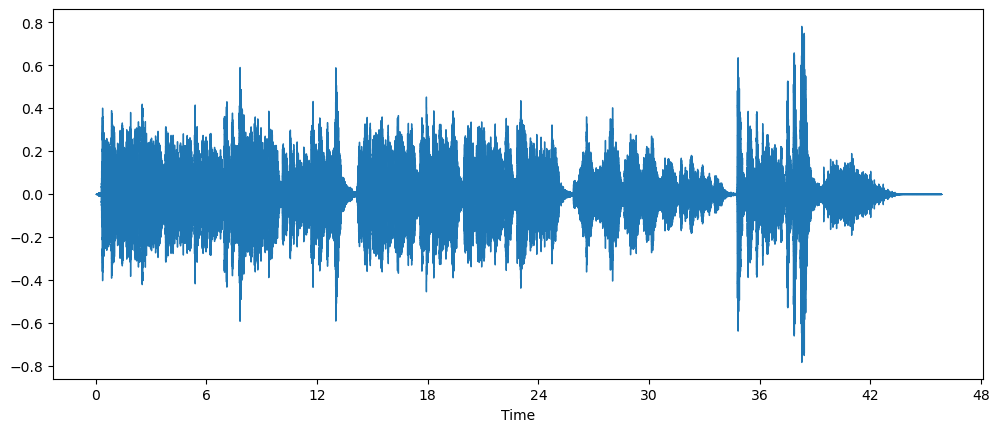

In [2]:
audio_array, sampling_rate = librosa.load(librosa.ex("brahms"))
print('Audio :', audio_array)
print('Sampling Rate :',sampling_rate)

plt.figure().set_figwidth(12)
librosa.display.waveshow(audio_array, sr=sampling_rate)
plt.show()

# Listen the audio files

In [3]:
from IPython.display import Audio as aud

aud(audio_array, rate=16_000)

# Mel spectrogram of an audio signal
It takes several parameters:
* y: The audio signal array.
* sr: The sampling rate of the audio signal.
* n_mels: The number of Mel frequency bins to generate in the spectrogram.
* fmax: The highest frequency (in Hz) to include in the spectrogram. Frequencies above this value will be discarded.

The `librosa.power_to_db` function converts a power spectrogram (like the Mel spectrogram) to decibels (dB) scale. It takes the spectrogram as input and computes the logarithm of the magnitudes with a reference point. In this case, ref=np.max scales the logarithmic values with respect to the maximum value in the input spectrogram.

In [4]:
# Mel spectrogram of an audio signal
spectrogram = librosa.feature.melspectrogram(y=audio_array, sr=sampling_rate,
                                   n_mels=128, fmax=8_000)

# converts a power spectrogram S to decibels (dB) scale
decibels_scale = librosa.power_to_db(spectrogram, ref=np.max)
decibels_scale

array([[-80., -80., -80., ..., -80., -80., -80.],
       [-80., -80., -80., ..., -80., -80., -80.],
       [-80., -80., -80., ..., -80., -80., -80.],
       ...,
       [-80., -80., -80., ..., -80., -80., -80.],
       [-80., -80., -80., ..., -80., -80., -80.],
       [-80., -80., -80., ..., -80., -80., -80.]], dtype=float32)

## Display Spectrogram: 
The librosa.display.specshow function displays a spectrogram. It takes several parameters:
* decibels_scale: The Mel spectrogram in decibels.
* x_axis: The axis representing time ("time" in this case).
* y_axis: The axis representing frequency ("mel" in this case, which represents the Mel frequency scale).
* sr: The sampling rate.
* fmax: The maximum frequency to display.

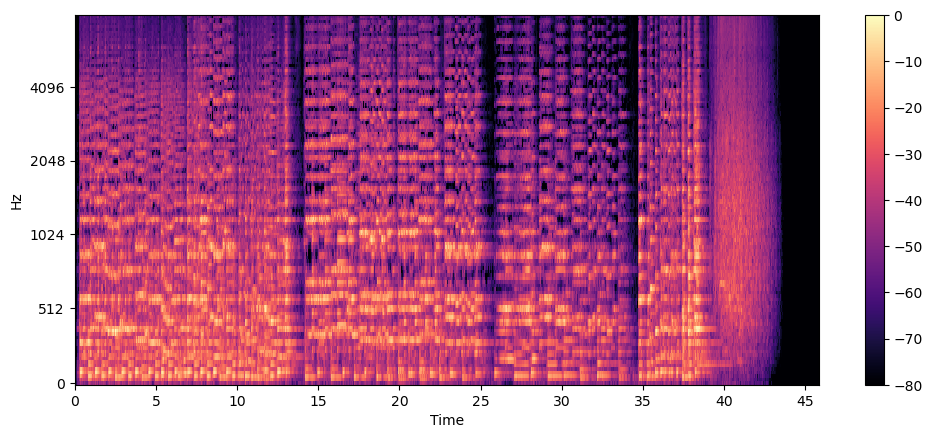

In [5]:
# Mel spectrogram of an audio signal
spectrogram = librosa.feature.melspectrogram(y=audio_array, sr=sampling_rate,
                                   n_mels=128, fmax=8_000)
# converts a power spectrogram S to decibels (dB) scale
decibels_scale = librosa.power_to_db(spectrogram, ref=np.max)

plt.figure().set_figwidth(12)

librosa.display.specshow(decibels_scale, 
                         x_axis="time", y_axis="mel", 
                         sr=sampling_rate,
                         fmax=8000)

plt.colorbar()
plt.show()

# Load Dataset

In [6]:
from datasets import load_dataset, Audio

minds = load_dataset("PolyAI/minds14", name="en-US",
                     split="train")
# Cast Audio Column
minds = minds.cast_column("audio", Audio(sampling_rate=16_000))
minds

Generating train split: 0 examples [00:00, ? examples/s]

Dataset minds14 downloaded and prepared to /root/.cache/huggingface/datasets/PolyAI___minds14/en-US/1.0.0/65c7e0f3be79e18a6ffaf879a083daf706312d421ac90d25718459cbf3c42696. Subsequent calls will reuse this data.


Dataset({
    features: ['path', 'audio', 'transcription', 'english_transcription', 'intent_class', 'lang_id'],
    num_rows: 563
})

# Check the first data rows

In [7]:
example = minds[0]
example

{'path': '/root/.cache/huggingface/datasets/downloads/extracted/a19fbc5032eacf25eab0097832db7b7f022b42104fbad6bd5765527704a428b9/en-US~JOINT_ACCOUNT/602ba55abb1e6d0fbce92065.wav',
 'audio': {'path': '/root/.cache/huggingface/datasets/downloads/extracted/a19fbc5032eacf25eab0097832db7b7f022b42104fbad6bd5765527704a428b9/en-US~JOINT_ACCOUNT/602ba55abb1e6d0fbce92065.wav',
  'array': array([ 1.7056242e-05,  2.1872745e-04,  2.2809987e-04, ...,
          3.4384240e-05, -5.9636477e-06, -1.7684666e-05], dtype=float32),
  'sampling_rate': 16000},
 'transcription': 'I would like to set up a joint account with my partner',
 'english_transcription': 'I would like to set up a joint account with my partner',
 'intent_class': 11,
 'lang_id': 4}

# Listen the audio files

In [8]:
from IPython.display import Audio as aud

aud(example["audio"]["array"], rate=16_000)

# ASR (Automatic Speech Recognition) Transformer

In [9]:
from transformers import pipeline

asr = pipeline("automatic-speech-recognition",
               model="facebook/wav2vec2-base-960h")

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

Some weights of Wav2Vec2ForCTC were not initialized from the model checkpoint at facebook/wav2vec2-base-960h and are newly initialized: ['wav2vec2.masked_spec_embed']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


# Transcription

In [10]:
# example is one example from the dataset
audio_array = example["audio"]["path"]
transcription = asr(audio_array)
print(transcription)

{'text': 'I WOULD LIKE TO SET UP A JOINT ACCOUNT WITH MY PARTNER HOW DO I PROCEED WITH DOING THAT'}


## Examples

In [11]:
# Generates a random integer between 0 (inclusive) and minds.num_rows(exclusive)
index = np.random.randint(low=1, high=minds.num_rows)

# Access the files
example = minds[index]
# Audio patha
audio_path = example["audio"]["path"]
pred_transcription = asr(audio_path)
print(pred_transcription)

# Audio array
audio_array = example["audio"]["array"]
aud(example["audio"]["array"], rate=16_000)

{'text': "HOW'TO FET UP TE JOINA COUT"}


In [12]:
# Generates a random integer between 0 (inclusive) and minds.num_rows(exclusive)
index = np.random.randint(low=1, high=minds.num_rows)

# Access the files
example = minds[index]
# Audio patha
audio_path = example["audio"]["path"]
pred_transcription = asr(audio_path)
print(pred_transcription)

# Audio array
audio_array = example["audio"]["array"]
aud(example["audio"]["array"], rate=16_000)

{'text': 'I WOULD LIKE TO A PLY FOR A NEW BUSINESS LONE PLEASE'}


In [13]:
# Generates a random integer between 0 (inclusive) and minds.num_rows(exclusive)
index = np.random.randint(low=1, high=minds.num_rows)

# Access the files
example = minds[index]
# Audio patha
audio_path = example["audio"]["path"]
pred_transcription = asr(audio_path)
print(pred_transcription)

# Audio array
audio_array = example["audio"]["array"]
aud(example["audio"]["array"], rate=16_000)

{'text': 'HOW MUCH MONEY IS ON MY ACCOUNT'}


In [14]:
# Generates a random integer between 0 (inclusive) and minds.num_rows(exclusive)
index = np.random.randint(low=1, high=minds.num_rows)

# Access the files
example = minds[index]
# Audio patha
audio_path = example["audio"]["path"]
pred_transcription = asr(audio_path)
print(pred_transcription)

# Audio array
audio_array = example["audio"]["array"]
aud(example["audio"]["array"], rate=16_000)

{'text': "I NEED HOW FIGURING OUTWHAT'S WRONG WITH MY CARD"}


In [15]:
# Generates a random integer between 0 (inclusive) and minds.num_rows(exclusive)
index = np.random.randint(low=1, high=minds.num_rows)

# Access the files
example = minds[index]
# Audio patha
audio_path = example["audio"]["path"]
pred_transcription = asr(audio_path)
print(pred_transcription)

# Audio array
audio_array = example["audio"]["array"]
aud(example["audio"]["array"], rate=16_000)

{'text': "HI THERE A I'M JUST CALLING A TO INWHIRE ABOUTS A GETTING A NEW BUSINESS LONE AND HOW ID GO ABOUT THAT THANKS"}


In [16]:
# Generates a random integer between 0 (inclusive) and minds.num_rows(exclusive)
index = np.random.randint(low=1, high=minds.num_rows)

# Access the files
example = minds[index]
# Audio patha
audio_path = example["audio"]["path"]
pred_transcription = asr(audio_path)
print(pred_transcription)

# Audio array
audio_array = example["audio"]["array"]
aud(example["audio"]["array"], rate=16_000)

{'text': "GOOD MORNING YES I WAS WONDERING IF YOU COULD TELL ME WHAT MY MAXIM EIGHT  M WITHDRAW THEM IT WOULD BE ON THIS ACCOUNT YES I'S WONDER OMI WUAT DRONGMIT OMNI M WOULD BE"}


In [17]:
example["transcription"]

'good night I was wondering if you could tell me what my maximum ATM withdrawal limit would be on this account'